<a href="https://colab.research.google.com/github/sarathsoman14/sarathsoman14-Hotel-Booking-Exploratory-Data-Analysis-EDA-/blob/main/Hotel_Booking_Exploratory_Data_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing Data

In [450]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [451]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [452]:
# Importing Data
path='/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis (EDA)/Hotel Booking/Master File-Github/'
original_df=pd.read_csv(path + 'Hotel Bookings.csv')

# Intial investigation on Dataframe

In [453]:
# Making a copy of raw file to work upon to make sure raw file is intact
hotel_df=original_df.copy()

In [454]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [455]:
# Check the datatypes
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [456]:
# Check statastical aspects of the data
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000



# Now just take a look at the unique values of each column in the dataframe.


In [457]:
print(hotel_df['hotel'].unique())

['Resort Hotel' 'City Hotel']


There are two types of hotels
* Resort Hotel 
* City hotel

In [458]:
print(hotel_df['is_canceled'].unique())

[0 1]


This column predicts
* Booking cancelled = 1  
* Booking not cancelled = 0

In [459]:
print(hotel_df['lead_time'].unique())

[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141 189 187 223 284 214 202 211 16

* The column **Lead Time** predicts the time difference between guest books their room and the time they are scheduled to arrive at the hotel.

In [460]:
print(hotel_df['arrival_date_year'].unique())

[2015 2016 2017]


* **arrival_date_year** is Year of arrival of the guest.

In [461]:
print(hotel_df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


* **arrival_date_month** is Months of arrival of the guest.

In [462]:
print(hotel_df['arrival_date_week_number'].unique())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


* **arrival_date_week_number** is weak of arrival of the guest.

In [463]:
print(hotel_df['meal'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


**Meal type**.

* **BB** : Bed and Breakfast
* **HB** : Half Board (Breakfast and Dinner normally)

* **FB** : Full Board (Beakfast, Lunch and Dinner)
* **SC** : Self-catering
* **Undefined** : Rooms only packages without meals.



In [464]:
print(hotel_df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


* **arrival_date_month** is Months of arrival of the guest.

In [465]:
print(hotel_df['arrival_date_week_number'].unique())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


* **arrival_date_week_number** is weak of arrival of the guest.

In [466]:
print(hotel_df['meal'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [467]:
print(hotel_df['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


**Market segment** 
This provides source of information through which customer booked
* **TA** - "Travel Agent"
* **TO** - "Tour operators"
* **Direct** -"Direct booking

In [468]:
print(hotel_df['distribution_channel'].unique())


['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


**Distribution Channel** 
* We provides source of information through which customer booked
* **TA/TO** - "Travel Agent"/"Tour operators"
* **Direct** -"Direct booking"
* **Corporate**- "Corporate booking"

In [469]:
print(hotel_df['is_repeated_guest'].unique())

[0 1]


**Guests are new or old.**
* **1**  -> old guest
* **0** ->  New  guest

In [470]:
print(hotel_df['reserved_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [471]:
print(hotel_df['assigned_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [472]:
print(hotel_df['booking_changes'].unique())

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


In [473]:
print(hotel_df['deposit_type'].unique())

['No Deposit' 'Refundable' 'Non Refund']


In [474]:
print(hotel_df['company'].unique())

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [475]:
print(hotel_df['agent'].unique())

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

In [476]:
print(hotel_df['days_in_waiting_list'].unique())

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


In [477]:
print(hotel_df['customer_type'].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


**This column predicts**
* **Transient**
* **Transient-Party** 
* **Group**
* **Contract**

In [478]:
print(hotel_df['adr'].unique())

[  0.    75.    98.   ... 266.75 209.25 157.71]


In [479]:
print(hotel_df['required_car_parking_spaces'].unique())

[0 1 2 8 3]


In [480]:
print(hotel_df['total_of_special_requests'].unique())

[0 1 3 2 4 5]


In [481]:
print(hotel_df['reservation_status'].unique())

['Check-Out' 'Canceled' 'No-Show']


**This column predicts**
* **Check-Out**
* **Canceled**
* **No-Show**

# Cleaning the Data

**Step 1:Removing Duplicates and unnecesary values**

In [482]:
# Checking for duplicates
duplicate_rows=hotel_df[hotel_df.duplicated()]
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [483]:
duplicate_rows.shape
print('Number of duplicated rows are:',duplicate_rows.shape)

Number of duplicated rows are: (31994, 32)


In [484]:
# Droping the duplicated rows
hotel_df=hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

**Step 2:Handling Missing Values**

In [485]:
# Checking null values
hotel_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [486]:
# As we can clearly see that there are null values in column :
# company                           82137
# agent                             12193
# country                             452
# children                              4

In [487]:
# ASSUMPTIONS TAKEN
# 452 null values in country can be taken  as "others"
# Column children have very less null values so droping them would not affect the analysis
# Column company,agent have very high number of null values and assigning 0 to all the null values in column


In [488]:
# Assigning null values in column country as 'others'.
hotel_df['country'].fillna('others',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [489]:
# Checking if there is still any null value present in column country.
hotel_df['country'].isna().sum()

0

In [490]:
# Droping null values in column children
hotel_df = hotel_df.dropna(axis=0, subset=['children'])
hotel_df['children'].isna().sum()

0

In [491]:
# Filling null values of column comapny and agent with value 0
hotel_df['agent'] = hotel_df['agent'].fillna(0,axis=0)
hotel_df['company'] = hotel_df['company'].fillna(0,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [492]:
# Checking dataframe again to check if there are any null values present on not
hotel_df.count()

hotel                             87392
is_canceled                       87392
lead_time                         87392
arrival_date_year                 87392
arrival_date_month                87392
arrival_date_week_number          87392
arrival_date_day_of_month         87392
stays_in_weekend_nights           87392
stays_in_week_nights              87392
adults                            87392
children                          87392
babies                            87392
meal                              87392
country                           87392
market_segment                    87392
distribution_channel              87392
is_repeated_guest                 87392
previous_cancellations            87392
previous_bookings_not_canceled    87392
reserved_room_type                87392
assigned_room_type                87392
booking_changes                   87392
deposit_type                      87392
agent                             87392
company                           87392


## <b>***Since,data is cleaned.We can proceed with EDA***

# 1.Which hotel do most customers prefer ? -**Sarath-Complete**

In [493]:
# Checking most preferred hotel
most_prefered_hotel=hotel_df['hotel'].value_counts()
most_prefered_hotel

City Hotel      53424
Resort Hotel    33968
Name: hotel, dtype: int64

Text(0, 0.5, 'No. of bookings')

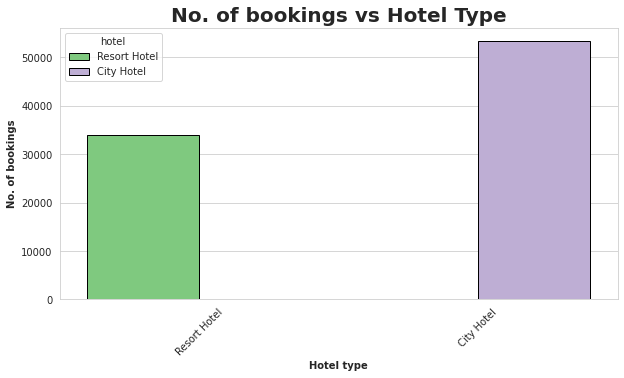

In [494]:
# Visualization in bar graph
plt.figure(figsize=(10,5))
sns.countplot(x='hotel',hue='hotel',data=hotel_df,palette='Accent',saturation=1,edgecolor='black',linewidth=1)
plt.title('No. of bookings vs Hotel Type',weight='bold',size=20)
plt.xlabel('Hotel type',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('No. of bookings',weight='bold')

In [495]:
# Visualization in pie chart of percentage distribution of hotel
hotel_type_perecent_distribution=hotel_df['hotel'].value_counts(normalize=True)
hotel_type_perecent_distribution

City Hotel      0.611315
Resort Hotel    0.388685
Name: hotel, dtype: float64

Text(0, 0.5, 'City Hotel')

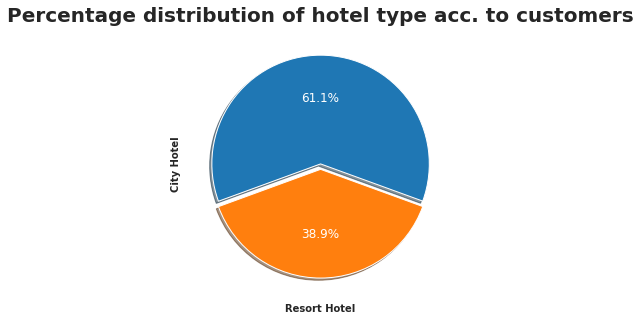

In [496]:
plt.figure(figsize=(10,5))
plt.pie(hotel_type_perecent_distribution,startangle=340,explode=(0,0.05),autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True)
plt.title('Percentage distribution of hotel type acc. to customers',weight='bold',size=20)
plt.xlabel('Resort Hotel',weight='bold')
plt.ylabel('City Hotel',weight='bold')

**Inference:** *It has been clear from both the graph that **City Hotel** is prefered by most of th customers and it contirubtes to **61.1%** of the total booking made*

# 2.What months have the most reservations and the least ?**Sarath-Complete**

## *By Month*

In [497]:
# Ordering arrival month coloum to have correct sequence of month
month_in_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
hotel_df['arrival_date_month']=pd.Categorical(hotel_df['arrival_date_month'],categories=month_in_order,ordered=True)

In [498]:
# Finding peaking booking by month and hotel type using groupby 
peak_booking_month=hotel_df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
peak_booking_month
# or using pd.crosstab we can compare the two columns and get it in tabular form 
# peak_booking_month_another_way=pd.crosstab(hotel_df['arrival_date_month'],hotel_df['hotel'])
# peak_booking_month_another_way

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,2730,1963
February,3605,2493
March,4856,2657
April,5080,2828
May,5413,2942
June,5005,2760
July,5744,4313
August,6587,4666
September,4240,2450


Text(0.5, 33.0, 'Hotel Type')

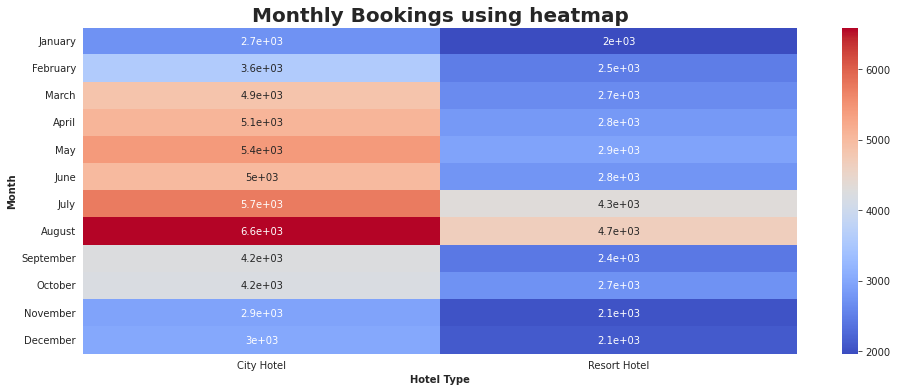

In [499]:
#Visualization:Heatmap 
plt.figure(figsize=(16,6))
sns.heatmap(peak_booking_month,cmap='coolwarm',annot=True)
plt.title('Monthly Bookings using heatmap',weight='bold',size=20)
plt.ylabel('Month',weight='bold')
plt.xlabel('Hotel Type',weight='bold')


Text(0, 0.5, 'Number of Bookings')

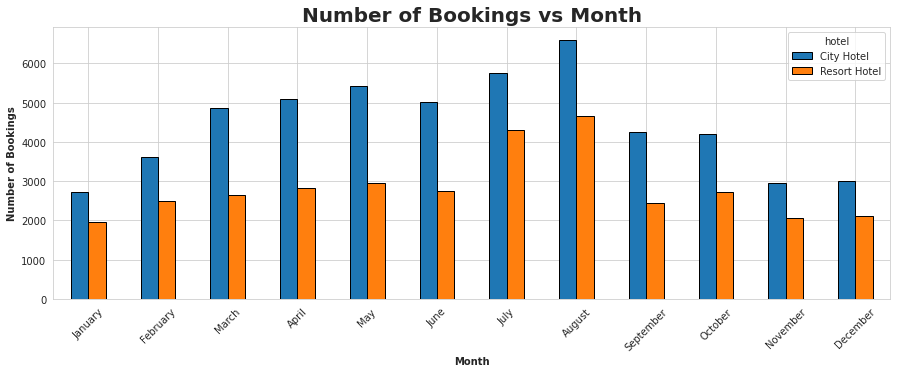

In [500]:
# Visualaization:Bar Chart
plt.rcParams['figure.figsize'] = (15, 5)
peak_booking_month.plot(kind='bar',edgecolor='black')
plt.title('Number of Bookings vs Month',weight='bold',size=20)
plt.xlabel('Month',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Bookings',weight='bold')



/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


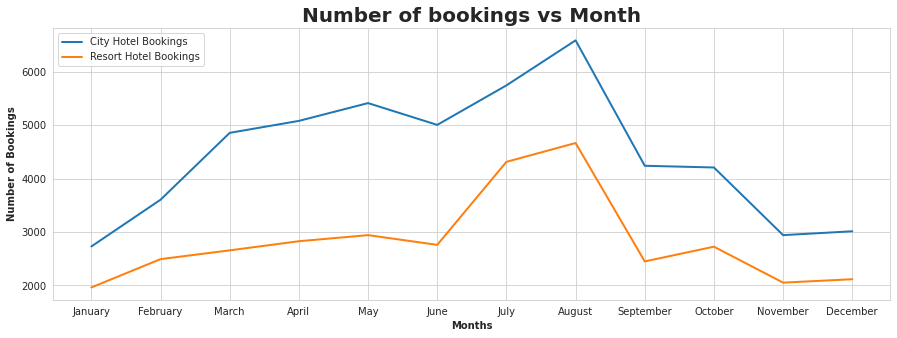

In [501]:
# Visualaization:Line Chart
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(peak_booking_month[['City Hotel']], label = 'City Hotel Bookings', linewidth=2)
plt.plot(peak_booking_month[['Resort Hotel']], label = 'Resort Hotel Bookings', linewidth=2)
plt.title('Number of bookings vs Month',weight='bold',fontsize=20)
plt.ylabel('Number of Bookings',weight='bold')
plt.xlabel('Months',weight='bold')
plt.legend(loc='upper left')

## *By Year*

In [502]:
# Trend in booking by year
booking_year_trend=hotel_df.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()
booking_year_trend

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,6546,6763
2016,26759,15632
2017,20119,11573


Text(0, 0.5, 'No. of bookings')

<Figure size 720x360 with 0 Axes>

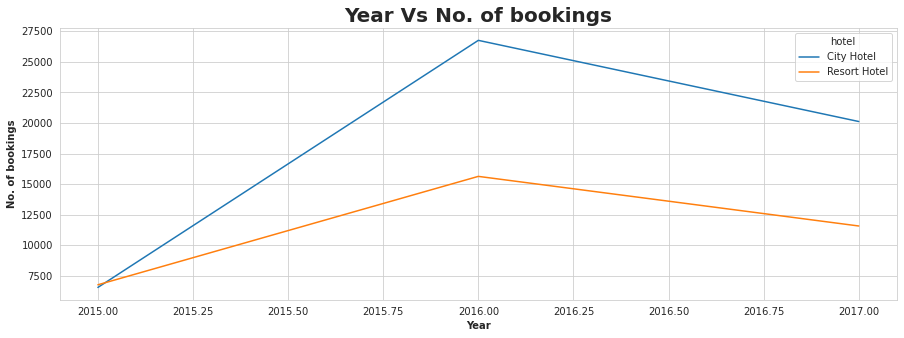

In [503]:
# Visualaization:Line Plot
plt.figure(figsize=(10, 5))
booking_year_trend.plot(kind='line')
plt.title('Year Vs No. of bookings',fontsize=20,weight='bold')
plt.xlabel('Year',weight='bold')
plt.ylabel('No. of bookings',weight='bold')

**Inference:**

*   *From **March to August**, bookings **increased**, and **August** saw the **highest** number of bookings.*

*   *From the heatmap and bar chart above, It can be concluded that** August** is the **busiest month** for **both the hotels**, followed by July and May.*

*   *It is clear from the bar chart that in the City and Resort hotel, the **fewest** bookings occur during the months of **November, December and January**.

*   From the above line graph,it can be concluded that number of bookings **increased from year 2015 to 2016** and **started declining post year 2016**









# 3.What type of room do guests book the most? - **Shrikant-Complete**

In [504]:
# Check how many types of rooms are provided through Hotels-

room_type_in_hotel = hotel_df['reserved_room_type'].unique()
print(f'Types of room in hotel are : {room_type_in_hotel}')

Types of room in hotel are : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [505]:
# Check which type of room is most preffered by the guest-

most_prefer_room = hotel_df['reserved_room_type'].value_counts().reset_index()
most_prefer_room.columns=['Room_type','Number_of_prefrence']
most_prefer_room


,Room_type,Number_of_prefrence
0,A,56552
1,D,17398
2,E,6049
3,F,2823
4,G,2052
5,B,995
6,C,915
7,H,596
8,L,6
9,P,6


Text(0, 0.5, 'Number of Bookings')

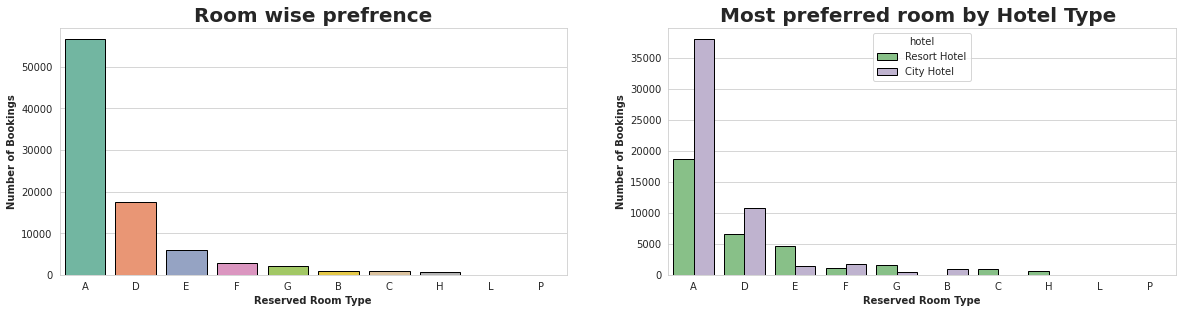

In [506]:
# Visualization: Bar chart
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.barplot(x=most_prefer_room["Room_type"],y=most_prefer_room["Number_of_prefrence"],palette="Set2",edgecolor='black',linewidth=1)
plt.title("Room wise prefrence", weight='bold', fontsize=20)
plt.ylabel("Number of Bookings", weight='bold')
plt.xlabel("Reserved Room Type", weight='bold')

plt.subplot(2,2,2)
sns.countplot(x='reserved_room_type',data=hotel_df,order=hotel_df['reserved_room_type'].value_counts().index,hue='hotel',palette="Accent",edgecolor='black',linewidth=1)
plt.title('Most preferred room by Hotel Type ',weight='bold',fontsize=20)
plt.xlabel('Reserved Room Type',weight='bold')
plt.ylabel('Number of Bookings',weight='bold')

**Inference:**

*   *Type **A** rooms were **most resreved** by the guest in both the hotels follwed by Type D,E,F,G rooms.* 



# 4.Which rooms are most often reassigned when guests arrive?**Deepak-Complete**

In [507]:
#DIFFERT ROOM ASSIGNED

## Overall

In [508]:
# Write a function to comapre the rooms in both columns
def get_same_type_room_assigned_or_not(a,b):
  '''This function will compare the two columns and will assign the o/p as Same Room Assigned or Different Room Assigned'''
  if a==b:
    return 'Same Room Assigned'
  else:
    return "Different Room Assigned"

In [509]:
# test the function get_same_type_room_assigned_or_not
get_same_type_room_assigned_or_not(hotel_df.iloc[0]['reserved_room_type'],hotel_df.iloc[0]['assigned_room_type'])

'Same Room Assigned'

In [510]:
# Create new column:room_reassigned_status using fucntion get_same_type_room_assigned_or_not
hotel_df['room_reassigned_status']=hotel_df.apply(lambda row:get_same_type_room_assigned_or_not(row['reserved_room_type'],
                                                                                     row['assigned_room_type']),axis=1)

In [511]:
#Overall change % data
room_change_percentage=hotel_df['room_reassigned_status'].value_counts(normalize=1).reset_index()
room_change_percentage.rename(columns={'index':'Room Change Status','room_reassigned_status':'%'},inplace=True)
room_change_percentage




,Room Change Status,%
0,Same Room Assigned,0.849998
1,Different Room Assigned,0.150002


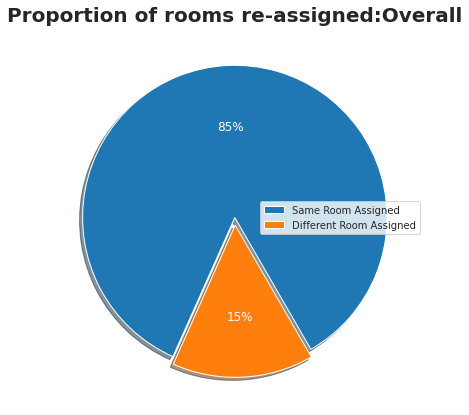

In [512]:
# Visualization
plt.figure(figsize=(7,7))
plt.pie(x='%',startangle=300,autopct='%1.0f%%' ,textprops={'color':"w",'fontsize':12},data=room_change_percentage,shadow=True,explode=(0,0.05))
plt.title('Proportion of rooms re-assigned:Overall',fontsize=20,weight='bold')
# OR # labels=['Same Room Assigned','Different Room Assigned	']
plt.legend(labels=room_change_percentage["Room Change Status"].value_counts().index,loc=('center right'))



In [513]:
# Colnclusion over all ~15% room change was observed

## *By Hotel Type*

In [514]:
room_change_percentage_by_hotel_type=hotel_df.groupby('hotel')['room_reassigned_status'].value_counts(normalize=1)
room_change_percentage_by_hotel_type

hotel         room_reassigned_status 
City Hotel    Same Room Assigned         0.885969
              Different Room Assigned    0.114031
Resort Hotel  Same Room Assigned         0.793423
              Different Room Assigned    0.206577
Name: room_reassigned_status, dtype: float64

In [515]:
# CITY HOTEL
room_change_percentage_for_city_hotel=room_change_percentage_by_hotel_type[0:2]
room_change_percentage_for_city_hotel

hotel       room_reassigned_status 
City Hotel  Same Room Assigned         0.885969
            Different Room Assigned    0.114031
Name: room_reassigned_status, dtype: float64

In [516]:
# RESORT HOTEL
room_change_percentage_for_resort_hotel=room_change_percentage_by_hotel_type[2:6]
room_change_percentage_for_resort_hotel

hotel         room_reassigned_status 
Resort Hotel  Same Room Assigned         0.793423
              Different Room Assigned    0.206577
Name: room_reassigned_status, dtype: float64

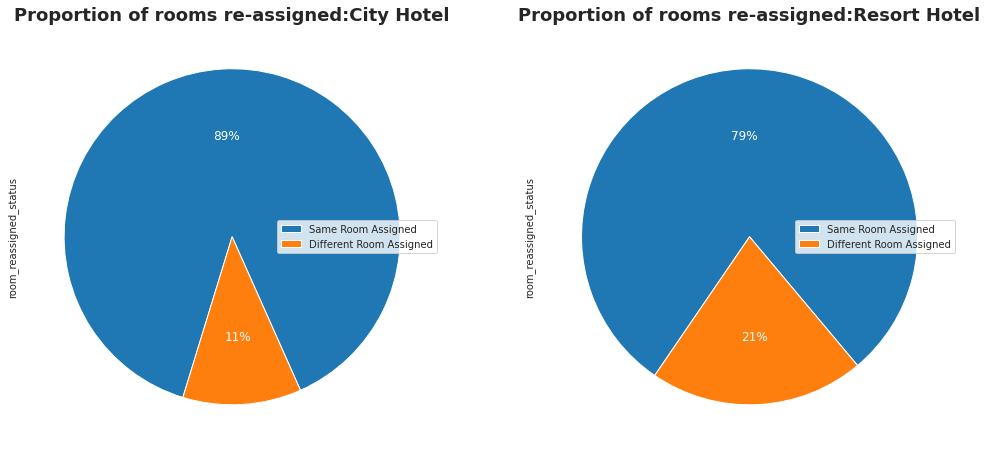

In [517]:
# Visualization
plt.figure(figsize=(17,17))

# City Hotel
plt.subplot(2,2,1)
room_change_percentage_for_city_hotel.plot(kind='pie',x='%',startangle=294,autopct='%1.0f%%' ,textprops={'color':"w",'fontsize':12})
plt.title('Proportion of rooms re-assigned:City Hotel',weight='bold',fontsize=18)
# Took the legend from the room_change_percentage["Room Change Status"]
plt.legend(labels=room_change_percentage["Room Change Status"].value_counts().index,loc=('center right'))

# City Hotel
plt.subplot(2,2,2)
room_change_percentage_for_resort_hotel.plot(kind='pie',x='%',startangle=310,autopct='%1.0f%%' ,textprops={'color':"w",'fontsize':12})
plt.title('Proportion of rooms re-assigned:Resort Hotel',weight='bold',fontsize=18)
# Took the legend from the room_change_percentage["Room Change Status"]
plt.legend(labels=room_change_percentage["Room Change Status"].value_counts().index,loc=('center right'))



In [518]:
# City Hotel face ~11 % change in room in 3 years and 21% for Resort Hotel

## *By Month*

In [519]:
room_change_by_month=hotel_df.groupby(['hotel','arrival_date_month'])['room_reassigned_status'].value_counts().unstack()
room_change_by_month


room_reassigned_status           Different Room Assigned  Same Room Assigned
hotel        arrival_date_month                                             
City Hotel   January                                 232                2498
             February                                418                3187
             March                                   583                4273
             April                                   495                4585
             May                                     542                4871
             June                                    443                4562
             July                                    516                5228
             August                                  607                5980
             September                               796                3444
             October                                 671                3537
             November                                413                2529
             December                                376                2638
Resort Hotel January                                 771                1192
             February                                760                1733
             March                                   689                1968
             April                                   568                2260
             May                                     570                2372
             June                                    344                2416
             July                                    489                3824
             August                                  467                4199
             September                               467                1983
             October                                 648                2078
             November                                646                1407
             December                                598                1519

Text(0.5, 0, 'Arrival Month')

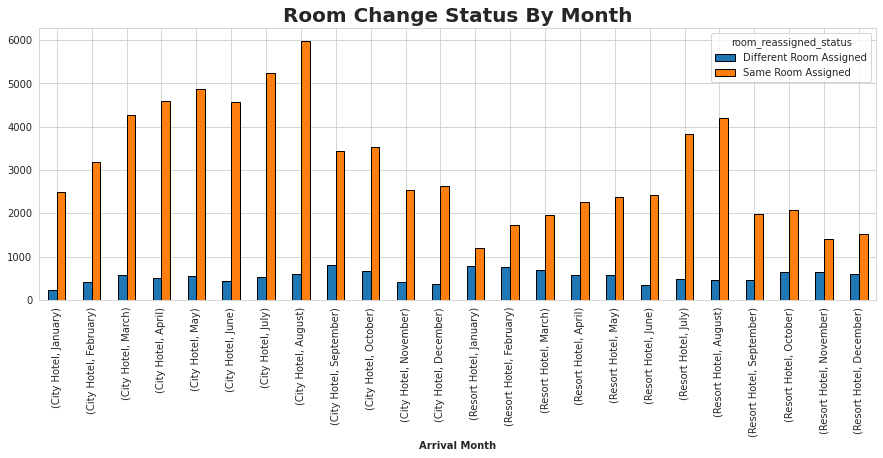

In [520]:
# Visualization
room_change_by_month.plot(kind='bar',edgecolor='black')
plt.title('Room Change Status By Month',weight='bold',fontsize=20)
plt.xlabel('Arrival Month',weight='bold')

In [521]:
# September was the month for City Hotel with highes room changes while for resort hotel it was the month of Janurary

## **By Room Type**

In [522]:
# Most changes in which room type?
room_change_by_room_type=hotel_df[hotel_df['room_reassigned_status']=='Different Room Assigned'].groupby(['reserved_room_type'])['room_reassigned_status'].value_counts().unstack()
# Sort in descending order
room_change_by_room_type.sort_values('Different Room Assigned',ascending=False)

room_reassigned_status,Different Room Assigned
reserved_room_type,
A,10673
D,1414
E,587
F,187
B,125
G,53
C,48
H,17
L,5


<Figure size 720x360 with 0 Axes>

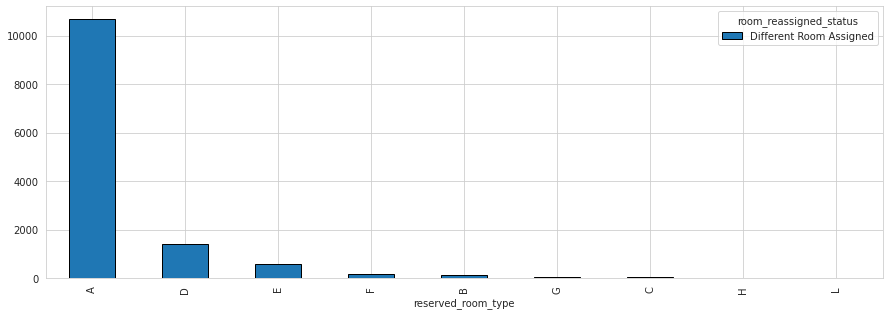

In [523]:
plt.figure(figsize=(10,5))
room_change_by_room_type.sort_values('Different Room Assigned',ascending=False).plot(kind='bar',edgecolor='black')

In [524]:
# Conclusion:Type A rooms were most subject to room change follwed by D,E,F,B,C and negligible in H,L

**Inference:**
*   Over all ~15% room change was observed through out the year
*   City Hotel face 11% room change and Resort Hotel face 21% room change through out the 3 years
*   Highest number of changes in room were made in the month of the Septemeber for City Hotel and Janurary for Resort Hotel

*   Type A rooms are most susceptible to room shifting, followed by D, E, F, B, and C, and insignificant in H and L.





## 5. Do your customers prefer weekdays or weekends?**SHRIKANT-Complete**

## By Hotel Type

In [525]:
# Using groupby to create the desired dataframe
weekdays_weekends_df_by_hotel=hotel_df.groupby(['hotel']).agg({'stays_in_weekend_nights':'sum','stays_in_week_nights':'sum'})
weekdays_weekends_df_by_hotel

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,46595,121510
Resort Hotel,41258,107930


Text(0, 0.5, 'No. of bookings')

<Figure size 360x216 with 0 Axes>

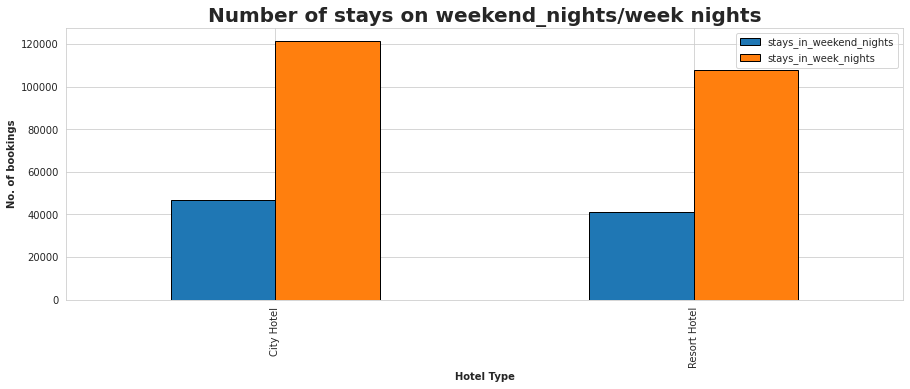

In [526]:
# Visualization
plt.figure(figsize=(5,3))
weekdays_weekends_df_by_hotel.plot(kind='bar',edgecolor='black',linewidth=1)
plt.title('Number of stays on weekend_nights/week nights',weight='bold',fontsize='20')
plt.xlabel('Hotel Type',weight='bold')
plt.ylabel('No. of bookings',weight='bold')


In [527]:
# customers prefer  to stay in week day nights the most other than weekends

Inference:
*   *As we can see from the bar chart, guests prefer to **stay weeknights the most** at both hotels than weekend nights.*
*   *Guests prefer to stay in City Hotel on weekends the most.*
  






# 6.Top five country's tourist which made the bookings? - **SHRIKANT-Complete**

In [528]:
# Check the top five countries from which guests are visiting most-

top_5_tourist_country= hotel_df["country"].value_counts().reset_index()[:5]
top_5_tourist_country.columns = ["country_name","number_of_guests"]
top_5_tourist_country

,country_name,number_of_guests
0,PRT,27449
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387


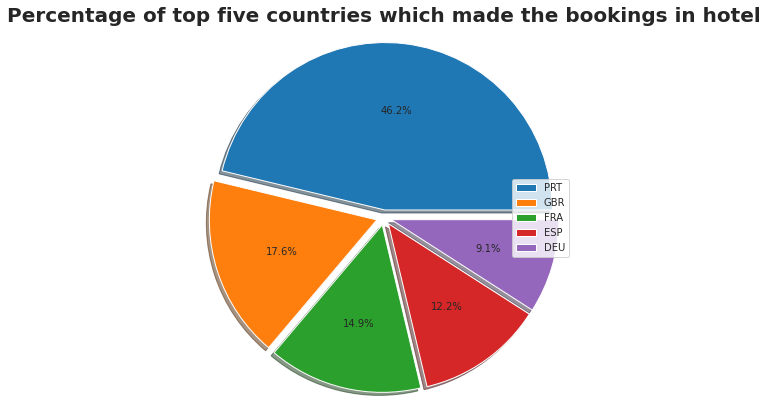

In [529]:
# Visualization in pie chart of percentage of top five countries which made the bookings in hotel
plt.figure(figsize=(7,7))
plt.pie(top_5_tourist_country["number_of_guests"],autopct="%1.1f%%",shadow=True,radius=1.1,explode=[.05]*5)
plt.legend(labels=top_5_tourist_country["country_name"].value_counts().index.tolist(),loc=('right'))
plt.title('Percentage of top five countries which made the bookings in hotel', weight='bold',size=20)
plt.show()



**Inference:**
*  **Portugal (PRT)** had the **highest number of travelers** who booked hotels, followed by the **United Kingdom (GBR), France (FRA), Spain (ESP) and Germany (DEU)**.




# 7.Which is the most preferred meal consumption by guests?-**SHYAM-Complete**

In [530]:
hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [531]:
meal=hotel_df['meal'].value_counts().reset_index()
meal.columns=['Meal_type','number_of_preference']
meal

,Meal_type,number_of_preference
0,BB,67974
1,SC,9481
2,HB,9085
3,Undefined,492
4,FB,360


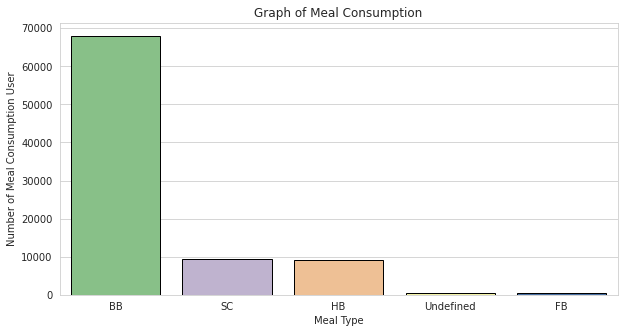

In [532]:
#Graph 
plt.figure(figsize=(10,5))
sns.barplot(x=meal["Meal_type"],y=meal["number_of_preference"],palette="Accent",edgecolor='black',linewidth=1)
plt.title("Graph of Meal Consumption")
plt.ylabel('Number of Meal Consumption User')
plt.xlabel("Meal Type")
plt.show()

**Inference:**
**"Bed & Breakfast (BB)"** meal type is  **mostly preferred** by guests. 

# 8.What type of hotels are most likely to be canceled?- **SARATH-Complete**

Overall segement of cancellation

In [533]:
# 0 represents Not-cancelled
# 1 represents cancelled
cancellation_percentage=hotel_df['is_canceled'].value_counts(normalize=True)
cancellation_percentage

0    0.725135
1    0.274865
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Not-cancelled')

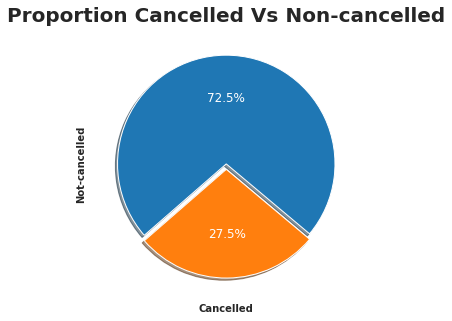

In [534]:
# Visualization:Cancelled Vs Not-cancelled
plt.figure(figsize=(10,5))
plt.pie(cancellation_percentage,startangle=320,explode=(0,0.05),autopct='%1.1f%%' ,textprops={'color':"w",'fontsize':12},shadow=True)
plt.title('Proportion Cancelled Vs Non-cancelled',fontsize=20,weight='bold')
plt.xlabel('Cancelled',weight='bold')
plt.ylabel('Not-cancelled',weight='bold')

In [535]:
# Overall 27.5% bookings were cancelled

In [536]:
# Create data frames with only cancelled data for further analysis
cancelled_df=hotel_df.loc[hotel_df['is_canceled']==1].reset_index()
cancelled_df


,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,room_reassigned_status
0,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,240.0,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06,Same Room Assigned
1,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,15.0,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22,Same Room Assigned
2,10,Resort Hotel,1,23,2015,July,27,1,0,4,...,240.0,0.0,0,Transient,123.0,0,0,Canceled,2015-06-23,Same Room Assigned
3,27,Resort Hotel,1,60,2015,July,27,1,2,5,...,240.0,0.0,0,Transient,107.0,0,2,Canceled,2015-05-11,Same Room Assigned
4,32,Resort Hotel,1,96,2015,July,27,1,2,8,...,0.0,0.0,0,Transient,108.3,0,2,Canceled,2015-05-29,Same Room Assigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24016,110280,City Hotel,1,132,2017,April,17,25,0,0,...,9.0,0.0,0,Transient,0.0,0,3,Canceled,2017-04-25,Different Room Assigned
24017,111355,City Hotel,1,4,2017,June,23,5,1,0,...,0.0,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05,Same Room Assigned
24018,111924,City Hotel,1,7,2017,May,22,31,0,1,...,0.0,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31,Same Room Assigned
24019,111925,City Hotel,1,6,2017,July,29,17,1,0,...,0.0,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17,Different Room Assigned


*Analysis by YEAR*

In [537]:
cancellation_by_year=cancelled_df.groupby('arrival_date_year')['is_canceled'].count()
cancellation_by_year


arrival_date_year
2015     2700
2016    11208
2017    10113
Name: is_canceled, dtype: int64

Text(0, 0.5, 'No. of cancellation')

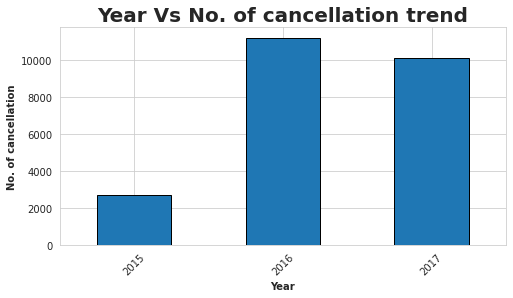

In [538]:
# Visualization:Bar chart
plt.figure(figsize=(8,4))
cancellation_by_year.plot(kind='bar',edgecolor='black',linewidth=1)
plt.title('Year Vs No. of cancellation trend',weight='bold',fontsize='20')
plt.xlabel('Year',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('No. of cancellation',weight='bold')

In [539]:
# Year 2016 witnessed highest no of booking cancelation

*Analysis by Month*

In [540]:
cancellation_by_month=cancelled_df.groupby('arrival_date_month')['is_canceled'].count().reset_index()
cancellation_by_month.rename(columns={'arrival_date_month':'month',"is_canceled":"No of cancellation"},inplace=True)
cancellation_by_month

,month,No of cancellation
0,January,1038
1,February,1415
2,March,1830
3,April,2409
4,May,2442
5,June,2354
6,July,3198
7,August,3619
8,September,1642
9,October,1642


Text(0, 0.5, 'Month')

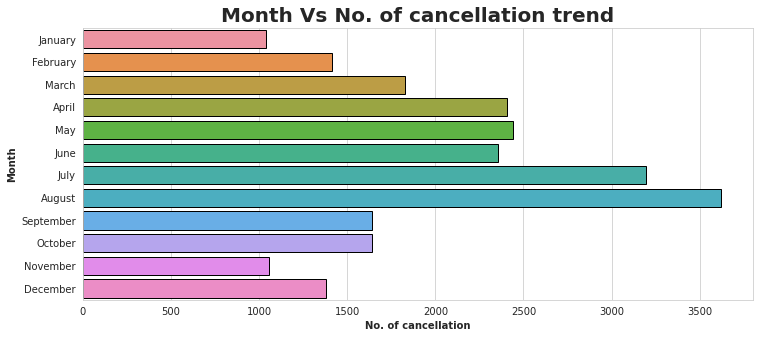

In [541]:
# Visualization:Bar chart
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.barplot(y='month',x='No of cancellation',data=cancellation_by_month,saturation=0.8,edgecolor='black',linewidth=1)
plt.title('Month Vs No. of cancellation trend',weight='bold',fontsize='20')
plt.xlabel('No. of cancellation',weight='bold')
plt.ylabel('Month',weight='bold')

In [542]:
# Highest cancelation moth was august and least was janurary

*Analysis by HOTEL TYPE*

In [543]:
cancellation_by_hotel_type=cancelled_df.groupby('is_canceled')['hotel'].value_counts(normalize = True).unstack()
cancellation_by_hotel_type


hotel,City Hotel,Resort Hotel
is_canceled,,
1,0.667957,0.332043


Text(0, 0.5, 'No. of cancellation')

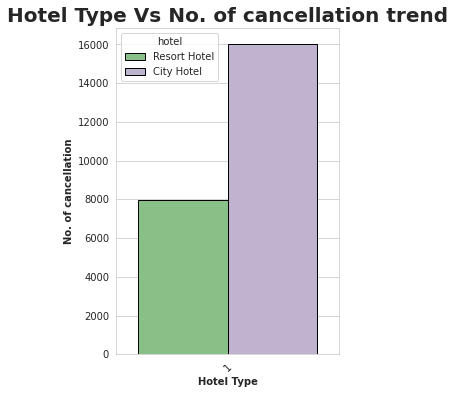

In [544]:
# Visualization:Bar chart
# here hue means groupby
plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.countplot(x='is_canceled',data=cancelled_df,hue='hotel',palette='Accent',edgecolor='black',linewidth=1)
plt.title('Hotel Type Vs No. of cancellation trend',weight='bold',fontsize='20')
plt.xlabel('Hotel Type',weight='bold')
plt.xticks(rotation=45)
plt.ylabel('No. of cancellation',weight='bold')


In [545]:
# City hotel faced highest cancellation of bookings 

**Inference:**
*   *It is clear from the pie chart that **overall 27.5%** of cancellations are observed.*
*   *Year **2016** saw the **highest** number of booking **cancellations** and **2015** the **least**.*
*  *August was the month that saw the **highest** number of **cancellations** and the **least in January**.*
*   *From the graph it is observed that **City Hotel has more cancellations** than Resort Hotel.*





# 9.What is the total number of bookings by Market Segment?- **SHAYAM-Complete**

In [546]:
#Find count of each market segment to predict which segment is popular.
df_Market_Segment = hotel_df['market_segment'].value_counts().reset_index().rename(columns = {'index':'MarketSegment','market_segment':'MarketSegment_Wise_Count'}).sort_values(by = 'MarketSegment_Wise_Count', ascending = False)
plt.figure(figsize = (10,5))
print (df_Market_Segment)

   MarketSegment  MarketSegment_Wise_Count
0      Online TA                     51617
1  Offline TA/TO                     13889
2         Direct                     11803
3         Groups                      4942
4      Corporate                      4212
5  Complementary                       702
6       Aviation                       227


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Number of bookings by market segment')

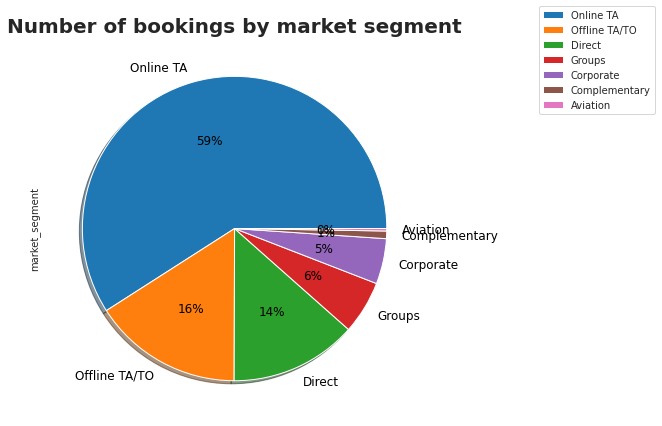

In [547]:
# Visualization
plt.figure(figsize=(7,7))
hotel_df['market_segment'].value_counts().plot(kind='pie',y='MarketSegment_Wise_Count',autopct='%1.0f%%',textprops={'color':"Black",'fontsize':12},shadow=True)
plt.legend(labels=df_Market_Segment["MarketSegment"].value_counts().index.tolist(),loc=(1.3,.8))
plt.title('Number of bookings by market segment',weight='bold',fontsize='20')

In [548]:
# Conclusion:Most of the booking were made by Online Travel Agency,Direct Bookings are less compare to Online TA

**Inference:**
*   **Most bookings** are made by **online Travel Agency**, followed by Offline TA/TO. **Direct Booking** is **also lower** but almost equal to offline TA/TO.






# 10.What is the average length of time for reservations prior to arrival ?  **DEEPAK-Complete**

In [549]:
lead_time_by_hotel=hotel_df[['hotel','lead_time']]
lead_time_by_hotel

,hotel,lead_time
0,Resort Hotel,342
1,Resort Hotel,737
2,Resort Hotel,7
3,Resort Hotel,13
4,Resort Hotel,14
...,...,...
119385,City Hotel,23
119386,City Hotel,102
119387,City Hotel,34
119388,City Hotel,109


In [550]:
lead_time_by_hotel.groupby('hotel')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53424.0,77.684112,82.113909,0.0,14.0,50.0,118.0,629.0
Resort Hotel,33968.0,83.371938,91.800279,0.0,8.0,47.0,138.0,737.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


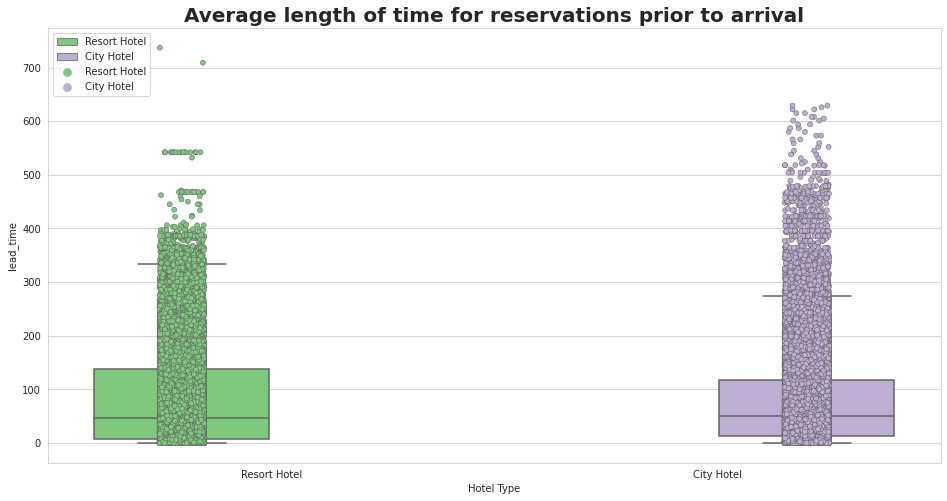

In [551]:
# Visualization
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.boxplot(x='hotel', y='lead_time', hue='hotel', data=lead_time_by_hotel,palette='Accent', fliersize=0,saturation=1)
sns.stripplot(x='hotel', y='lead_time', hue='hotel', data=lead_time_by_hotel,jitter=True, split=True, linewidth=0.5, palette='Accent')
plt.title('Average length of time for reservations prior to arrival',weight='bold',fontsize=20)
plt.xlabel('Hotel Type',weight='20')
plt.legend(loc='upper left')

In [552]:
# Guests prefer to book hotel 2-3 months before arrival

**Inference:**
*   *It is clearly visible from the plot that most of the guests prefers to  book 
the hotel **3-4 months** before arrival and average lead time is **2-3 months**.

# What is the Average Daily Rate (ADR) by year and month ?  **Deepak-Complete**

In [553]:
# ADR=AVERAGE DAILY RATE i.e price/total rooms booked

## *Analysis on ADR by Year*

In [554]:
# By Year
adr_year=hotel_df.groupby(['arrival_date_year','hotel'])['adr'].mean().unstack()
adr_year

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,89.850706,94.433664
2016,107.896449,90.655998
2017,121.987908,113.013353


Text(0, 0.5, 'Mean ADR')

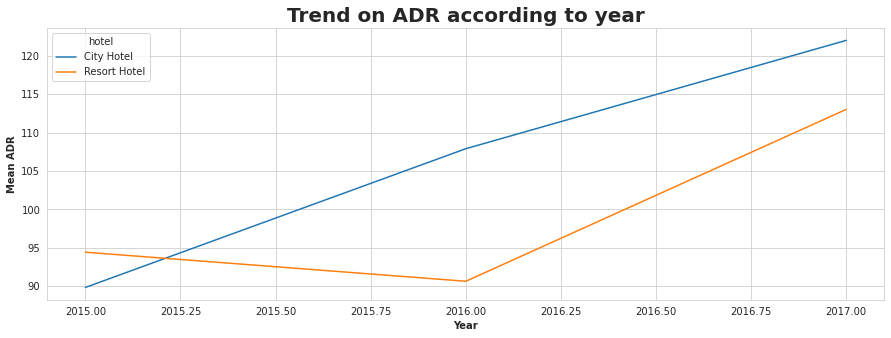

In [555]:
# Visualization:Line Chart
plt.rcParams['figure.figsize'] = (15, 5)
sns.set_style('whitegrid')
adr_year.plot(kind='line')
plt.title('Trend on ADR according to year',weight='bold',fontsize=20)
plt.xlabel('Year',weight='bold')
plt.ylabel('Mean ADR',weight='bold')

In [556]:
# Conculsion:City Hotel observed the proption growth in avg adr,and resort hotel adr was falling till pre 2016 and post 2016 it starting increasing

In [557]:
# City Hotel had liner growth in ADR and same is not the case for Resort Hotel

## *Analysis on ADR by Month*

In [558]:
# By Month
mean_adr_by_month=hotel_df.groupby('arrival_date_month')['adr'].mean().sort_values(ascending=False).reset_index()
mean_adr_by_month.rename(columns={'arrival_date_month':'month','adr':'Mean ADR of month'},inplace=True)
mean_adr_by_month

,month,Mean ADR of month
0,August,150.919220
1,July,135.542014
2,June,119.750120
3,September,112.081263
4,May,111.195703
5,April,103.612589
6,October,90.152518
7,March,81.609523
8,December,81.450226
9,February,74.692033


Text(0, 0.5, 'Month')

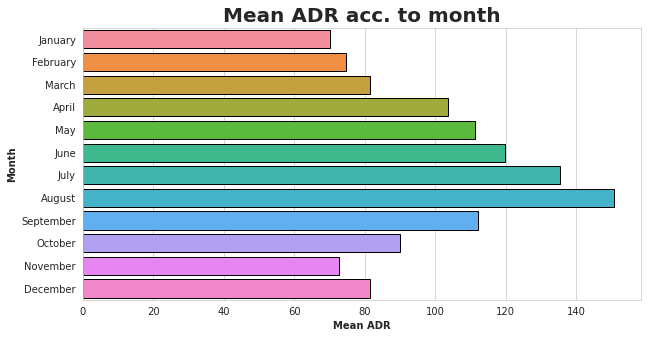

In [559]:
# Visualization:Bar Chart
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(y='month',x='Mean ADR of month',data=mean_adr_by_month,saturation=0.9,edgecolor='black')
plt.title('Mean ADR acc. to month',weight='bold',fontsize='20')
plt.xlabel('Mean ADR',weight='bold')
plt.ylabel('Month',weight='bold')

In [560]:
# Conclsion:August is having highest adr and janurary is having lowest adr

**Inference:**
*   *From the line plot we can see that **City Hotel had liner increase in ADR** through out the** year** and but for **Resort Hotel ADR** was **falling till pre 2016** and **post 2016 it started to see a raise**.* 

*   *From the bar plot,**August has the highest ADR** and **January has the lowest**.*



# 12.Find out count of customers on basis of customer type ?- **Shyam/Complete**

In [561]:
# Find out count of customers on basis of customer type.
customer=hotel_df["customer_type"].value_counts().reset_index()
customer.columns=["Customer_type","number_of_customers"]
customer

,Customer_type,number_of_customers
0,Transient,71986
1,Transient-Party,11723
2,Contract,3139
3,Group,544


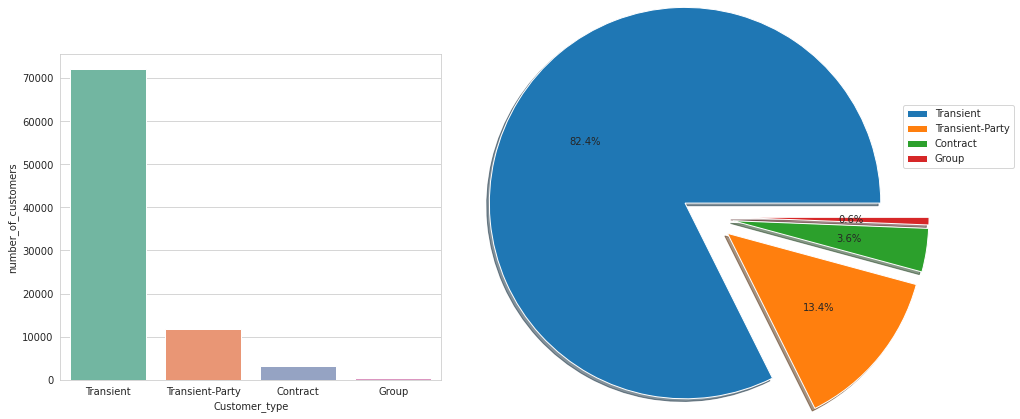

In [562]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=customer["Customer_type"],y=customer["number_of_customers"],palette="Set2")

plt.subplot(1,2,2)
plt.pie(hotel_df["customer_type"].value_counts(),autopct="%1.1f%%",shadow=True,radius=1.5,explode=[.2]*4)
plt.legend(labels=hotel_df["customer_type"].value_counts().index.tolist(),loc=(1.1,.65))
plt.show()

**Inference:** 
*   *Here we can see the **maximum number** of customers are from **transient category** which is near about **75.1 %**.*
